# 1. The Pima Indians Diabetes Data Loading and Initial Exploration:

In [ ]:
#Load the dataset into a pandas DataFrame and display the first 10 rows.
#Use info() to print the data types of each column and describe() for a statistical summary.

In [ ]:
 # Part 1: Import the data
 ## Path to your data
import os
data_path = ['']

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

In [ ]:
# Importing the dataset into a pandas DataFrame
filepath = os.sep.join(data_path+ ['diabetes.csv'])
data=pd.read_csv(filepath)

In [ ]:
# Display first 10 rows
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# statistical summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. Missing Values Identification: visualize missing values in the dataset with a bar chart

In [ ]:
# Check and visualize missing values in the dataset with a bar chart.
# Customization: Use a contrasting color for bars, set fontsize for labels, and add a title.


In [ ]:
# Calculate missing values per column
missing_values = data.isnull().sum()

In [ ]:
# Diabetes dataset does not have any missing(null) values.
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Calculate zero values per column (excluding the 'Outcome' column if present) to just plot bar chart with contrasting colors.
zero_values = (data.iloc[:,0:-1] == 0).sum()

# Filter columns with zero values
zero_values = zero_values[zero_values > 0]

In [ ]:
zero_values

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [ ]:
# Generate a list of contrasting colors using matplotlib's colormap
colors = cm.get_cmap('tab20', len(zero_values))  # 'tab20' is a palette with 20 contrasting colors

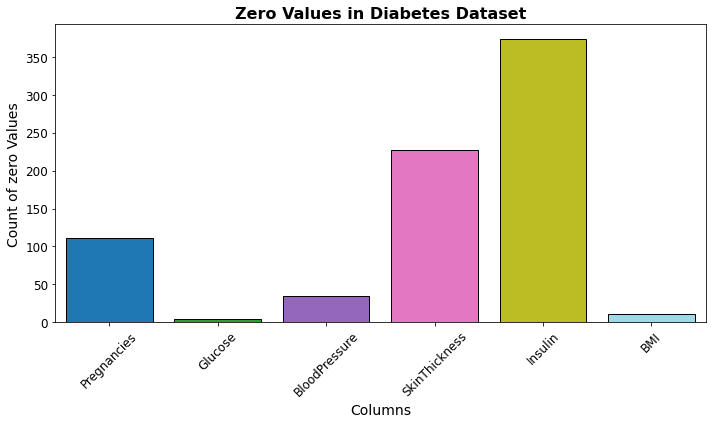

In [ ]:
# Plotting the missing values with customizations
plt.figure(figsize=(10, 6))
zero_values.plot(kind='bar', color='coral', edgecolor='black')
bars = plt.bar(zero_values.index, zero_values.values, color=[colors(i) for i in range(len(zero_values))], edgecolor='black')

# Customizations
plt.title('Zero Values in Diabetes Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count of zero Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# 3. Univariate Distribution Plot: Plot histograms for each numerical feature, adjusting the bin size

In [ ]:
#Plot histograms for each numerical feature, adjusting the bin size.
#Customization: Choose different colors for each histogram, set xlabel, ylabel, and add a descriptive title. Adjust tick_params for clarity.


In [ ]:
# Define a list of colors to use for each histogram
colors = cm.get_cmap('Set3', len(data.columns[:-1])).colors  # 'Set3' provides a variety of soft colors

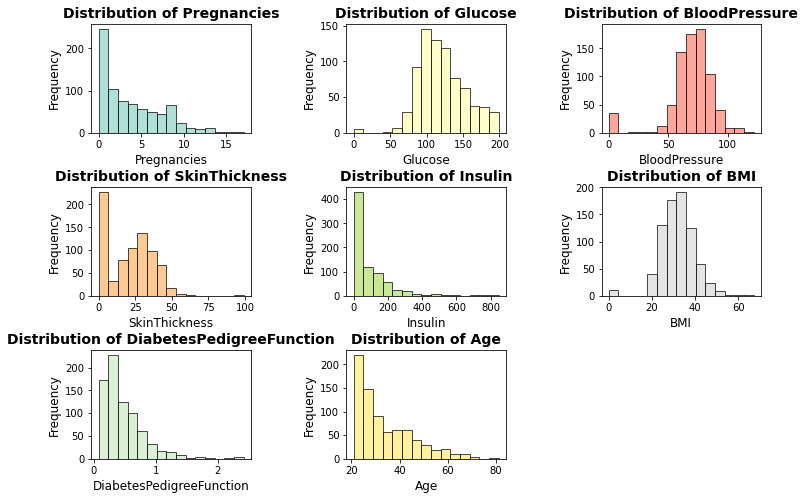

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot a histogram for each numerical column
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)  # Adjust rows/columns to fit the number of features
    plt.hist(data[column], bins=15, color=colors[i], edgecolor='black', alpha=0.7)  # Adjust bin size as needed

    # Customizations
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick size for clarity
    # Adjust layout with extra space between rows
    plt.subplots_adjust(wspace=0.6, hspace=0.5)  # Adjust column and row space


plt.show()

# 4. Box Plots for Outlier Detection for each feature

In [ ]:
#Create box plots to identify potential outliers for each feature.
#Customization: Use a sequential color scheme, label axes, and apply a title with an increased font size.


In [ ]:
# Define a sequential color scheme using matplotlib's colormap
cmap = cm.get_cmap('Blues')
feature_cols = data.columns[:-1]
colors = [cmap(i / len(feature_cols)) for i in range(len(feature_cols))]  # Generate colors from the colormap

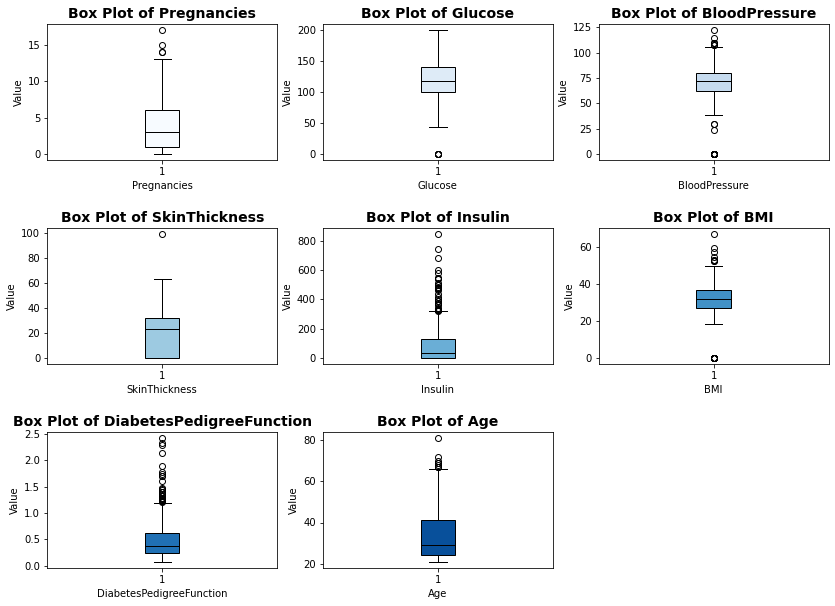

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Plot a box plot for each numerical column
for i, column in enumerate(feature_cols): # As all columns are numerical directly  retriveing all feature columns without fitering.
    plt.subplot(3, 3, i + 1)  # Adjust rows/columns to fit the number of features
    plt.boxplot(data[column], patch_artist=True, boxprops=dict(facecolor=colors[i]), medianprops=dict(color='black'))

    # Customizations
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.title(f'Box Plot of {column}', fontsize=14, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick size for clarity

    # Adjust layout with extra space between rows
    plt.subplots_adjust(hspace=0.5)  # Increase hspace to add space between rows
plt.show()

# 5. Pie Chart for Categorical Data: Visualize the proportion of diabetic vs. non-diabetic patients

In [ ]:
#Visualize the proportion of diabetic vs. non-diabetic patients with a pie chart.
#Customization: Use a color palette that distinguishes clearly between categories, add a legend, and a central title with a bold font.


In [ ]:
#Select the Target column
categorical_data = data['Outcome'].value_counts()

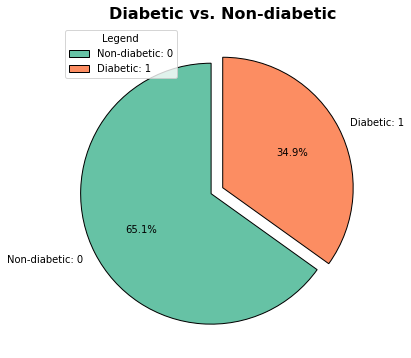

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
custom_label = ['Non-diabetic: 0', 'Diabetic: 1']
plt.pie(categorical_data, labels=custom_label, autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5', '#fc8d62'], explode=(0.1, 0), wedgeprops=dict(edgecolor='black'))
# Customizations
plt.title('Diabetic vs. Non-diabetic', fontsize=16, fontweight='bold')
plt.legend(loc='upper left', title='Legend')
plt.show()

# 6. Scatter Plots of Key Variables: 'Glucose' vs. 'BMI' and 'Age' vs. 'Insulin' variables

In [ ]:
#Generate scatter plots for 'Glucose' vs. 'BMI' and 'Age' vs. 'Insulin' variables.
#Customization: Differentiate groups using color, add gridlines, label axes, and apply custom font sizes for readability. Include a legend outside the plot area.
#Write your interpretation of the two scatter plots in your notebook file or your .py file.


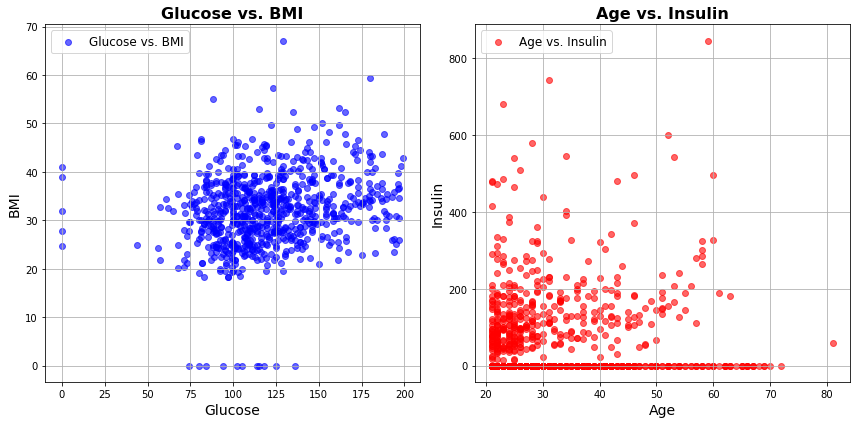

In [ ]:
# Creating the figure and subplots
plt.figure(figsize=(12, 6))

# Scatter plot for Glucose vs. BMI
plt.subplot(1, 2, 1)
# Scatter plot with single color and label
plt.scatter(data['Glucose'], data['BMI'], color='blue', alpha=0.6, label='Glucose vs. BMI')
# Adding titles, labels, gridlines, and legend
plt.title('Glucose vs. BMI', fontsize=16, fontweight='bold')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', fontsize=12)

# Scatter plot for Age vs. Insulin
plt.subplot(1, 2, 2)
plt.scatter(data['Age'], data['Insulin'], color='red', alpha=0.6, label='Age vs. Insulin')
# Adding titles, labels, gridlines, and legend
plt.title('Age vs. Insulin', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insulin', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Glucose vs. BMI:
# The  Glucose vs. BMI scatter plot indicates a clear trend showing that glucose levels generally rise with increasing BMI levels.
# The majority of participants exhibit glucose levels ranging from 75 to 150 when their BMI falls between 20 and 50.
# However, there are a few exceptions: some individuals display glucose levels below 75 or between 150 and 200, even though
# their BMI remains within the 20-50 range.

# Additionally, the plot highlights the presence of outliers, where participants with BMIs exceeding 50 have glucose levels
# varying between 75 and 180. This observation suggests that while there is a noticeable correlation between BMI and glucose
# levels, other factors may also be influencing glucose regulation in individuals with higher BMIs.

#Age Vs Insulin:
# The Age vs. Insulin scatter plot illustrates the relationship between age and insulin levels among participants.
# The data reveals that most individuals aged 0-60 have insulin levels below 200, suggesting that elevated insulin levels
# are not common in this age group. However, a small number of data points exceed the 200 insulin mark within the same age
#range, indicating that while higher insulin levels can occur, they are relatively rare among younger individuals.

# Moreover, the plot identifies a few notable outliers: participants under the age of 40 with insulin levels exceeding 600
# and those over 60 whose insulin levels fall below 200. These outliers highlight the complexity of insulin regulation
# and suggest that factors beyond age may influence insulin levels significantly in certain individuals.



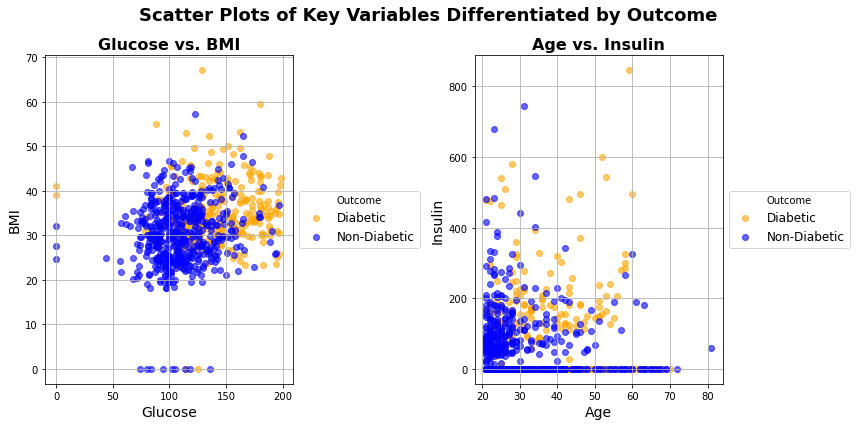

In [ ]:
# Define colors for each outcome group
colors = {0: 'blue', 1: 'orange'}
labels = {0: 'Non-Diabetic', 1: 'Diabetic'}

# Creating the figure and subplots
plt.figure(figsize=(12, 6))

# Scatter plot for Glucose vs. BMI
plt.subplot(1, 2, 1)
for outcome in data['Outcome'].unique():
    plt.scatter(data[data['Outcome'] == outcome]['Glucose'],
                data[data['Outcome'] == outcome]['BMI'],
                color=colors[outcome],
                alpha=0.6,
                label=labels[outcome])

# Adding titles, labels, gridlines
plt.title('Glucose vs. BMI', fontsize=16, fontweight='bold')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.legend(title="Outcome", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Scatter plot for Age vs. Insulin
plt.subplot(1, 2, 2)
for outcome in data['Outcome'].unique():
    plt.scatter(data[data['Outcome'] == outcome]['Age'],
                data[data['Outcome'] == outcome]['Insulin'],
                color=colors[outcome],
                alpha=0.6,
                label=labels[outcome])

# Adding titles, labels, gridlines
plt.title('Age vs. Insulin', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insulin', fontsize=14)
plt.grid(True)
plt.legend(title="Outcome", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Central title and layout adjustment
plt.suptitle('Scatter Plots of Key Variables Differentiated by Outcome', fontsize=18, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#  Glucose vs. BMI: The blue points, representing non-diabetic individuals, are more concentrated around the
# lower to mid-glucose levels (around 100-140) and BMI values (approximately 25-40).
# The orange points, representing diabetic individuals, tend to have slightly higher glucose levels on average,
#with a broader spread across higher BMI values.
# Higher glucose levels often correspond with higher BMI in the diabetic group, indicating a possible association between these two features and diabetes.

# Age vs. Insulin: Non-diabetic individuals tend to have lower insulin values, with a concentration near zero for
#a large number of cases, and there’s less variation in insulin levels overall. Diabetic individuals show a broader range of insulin values, especially toward
# higher levels. Age doesn’t show a strong visual correlation with insulin in this dataset,
#but higher insulin values do appear to be more common in the diabetic group.

# 7. Line Plot to Show Trends: 'Glucose' levels and 'BloodPressure' across different ages

In [ ]:
#Plot line graphs for 'Glucose' levels and 'BloodPressure' across different ages.
#Customization: Use distinct line styles and markers, label axes, set xticks rotation, and add an informative title.


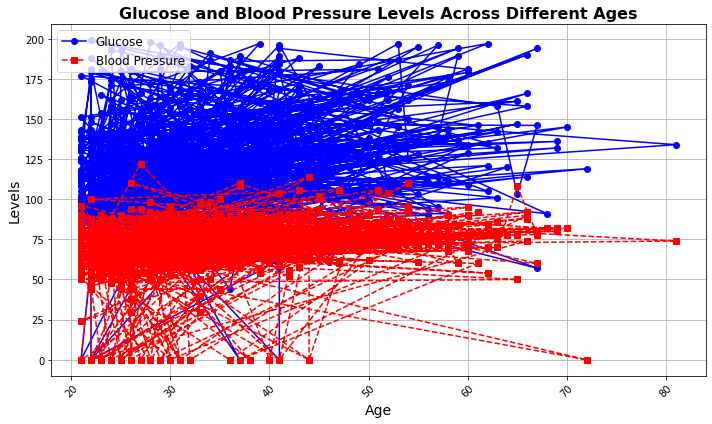

In [ ]:
# Creating the figure
plt.figure(figsize=(10, 6))

# Plotting Glucose levels across different ages
plt.plot(data['Age'], data['Glucose'], linestyle='-', marker='o', color='blue', label='Glucose')

# Plotting BloodPressure levels across different ages
plt.plot(data['Age'], data['BloodPressure'], linestyle='--', marker='s', color='red', label='Blood Pressure')

# Customizing the plot
plt.title('Glucose and Blood Pressure Levels Across Different Ages', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Levels', fontsize=14)
plt.xticks(rotation=45)  # Rotating xticks for readability
plt.legend(loc='upper left', fontsize=12)

# Show the grid for clarity
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# 8. Stacked Histograms: Compare the distribution of 'BMI' for diabetic and non-diabetic patients

In [ ]:
#Compare the distribution of 'BMI' for diabetic and non-diabetic patients using stacked histograms.
#Customization: Use contrasting colors, adjust alpha for transparency, label each section, and add a clear legend.


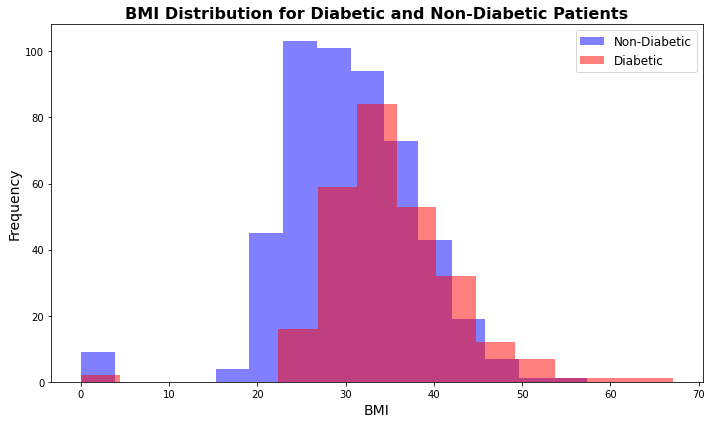

In [ ]:
# Creating the figure
plt.figure(figsize=(10, 6))

# Separating data for diabetic and non-diabetic patients
non_diabetic = data[data['Outcome'] == 0]['BMI']
diabetic = data[data['Outcome'] == 1]['BMI']

# Plotting stacked histograms
plt.hist(non_diabetic, bins=15, color='blue', alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic, bins=15, color='red', alpha=0.5, label='Diabetic')

# Customizing the plot
plt.title('BMI Distribution for Diabetic and Non-Diabetic Patients', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# 9. Violin Plot for Advanced Distribution Visualization of key metrics against outcomes with violin plots

In [ ]:
#Visualize the distribution of key metrics against outcomes with violin plots.
#Customization: Set the color palette, adjust linewidth, and label each violin plot with corresponding feature names.


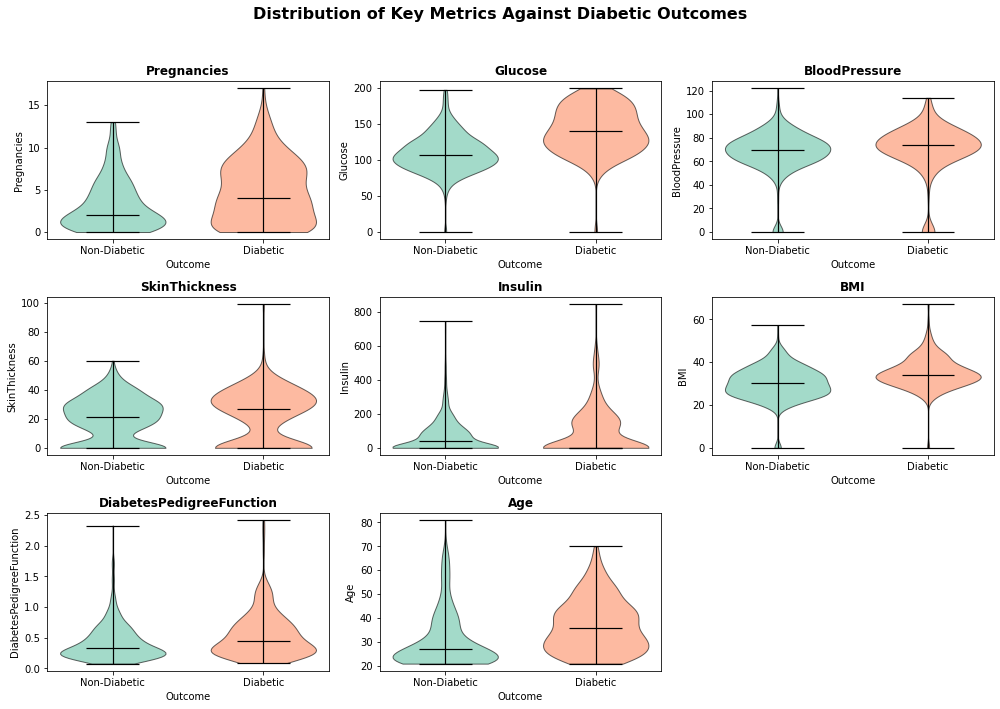

In [ ]:
# Setting up the figure
plt.figure(figsize=(14, 10))

# List of key features to visualize
features = data.iloc[:,0:-1].columns

# Color settings for diabetic and non-diabetic distributions
colors = ['#66c2a5', '#fc8d62']  # Using contrasting colors

# Creating violin plots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Arranging plots in a 3x3 grid

    # Data for each category: 0 for non-diabetic, 1 for diabetic
    non_diabetic_data = data[data['Outcome'] == 0][feature]
    diabetic_data = data[data['Outcome'] == 1][feature]

    # Using Matplotlib's violin plot function
    parts = plt.violinplot([non_diabetic_data, diabetic_data], positions=[0, 1], showmeans=False, showmedians=True, widths=0.7)

    # Setting colors for each violin
    for j, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[j])  # Setting color for each category
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)  # Adjust transparency for clarity
    for line in ['cbars', 'cmins', 'cmaxes', 'cmedians']:
        parts[line].set_edgecolor('black')
        parts[line].set_linewidth(1.2)

    # Setting labels and title
    plt.title(feature, fontsize=12, fontweight='bold')
    plt.xlabel('Outcome')  # Labeling Outcome on x-axis for each plot
    plt.ylabel(feature)  # Labeling the feature name on y-axis
    plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])

# Adjust layout for better fit
plt.suptitle('Distribution of Key Metrics Against Diabetic Outcomes', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

# 10. Correlation Heatmap within the featurs and target columns

In [ ]:
#Calculate and plot a heatmap of the correlation matrix.
#Customization: Choose a diverging color map, add annotations, set the color bar, and ensure tick labels are readable.


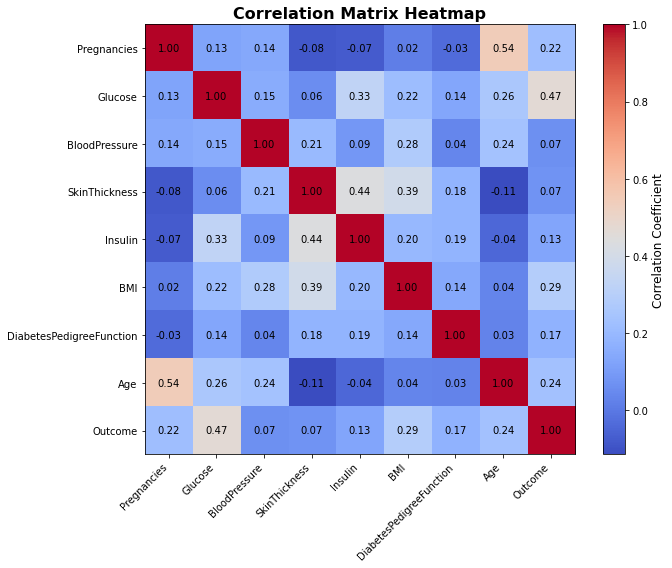

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add color bar for reference
color_bar = plt.colorbar(heatmap)
color_bar.set_label('Correlation Coefficient', fontsize=12)

# Add annotations for each cell
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

# Customizing the heatmap
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, fontsize=10)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# 11. Pairwise Scatter Plots for three variable pairs

In [ ]:
#Create scatter plots for three variable pairs.
#Customization: Use different marker styles and colors, add a grid, and customize tick frequency and labels.


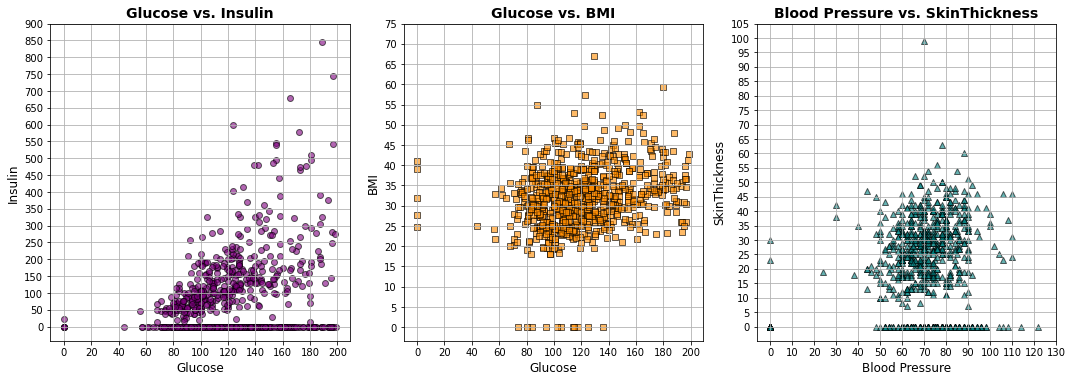

In [ ]:
# Setting up figure with subplots for pairwise scatter plots
plt.figure(figsize=(15, 15))

# Pair 1: Glucose vs. Insulin
plt.subplot(3, 3, 1)
plt.scatter(data['Glucose'], data['Insulin'], color='purple', marker='o', alpha=0.6, edgecolor='black')
plt.title('Glucose vs. Insulin', fontsize=14, fontweight='bold')
plt.xlabel('Glucose', fontsize=12)
plt.ylabel('Insulin', fontsize=12)
plt.grid(True)
plt.xticks(range(0, int(data['Glucose'].max()) + 20, 20))
plt.yticks(range(0, int(data['Insulin'].max()) + 100, 50))

# Pair 2: Glucose vs. BMI
plt.subplot(3, 3, 2)
plt.scatter(data['Glucose'], data['BMI'], color='darkorange', marker='s', alpha=0.6, edgecolor='black')
plt.title('Glucose vs. BMI', fontsize=14, fontweight='bold')
plt.xlabel('Glucose', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True)
plt.xticks(range(0, int(data['Glucose'].max()) + 20, 20))
plt.yticks(range(0, int(data['BMI'].max()) + 10, 5))

# Pair 3: Blood Pressure vs. SkinThickness
plt.subplot(3, 3, 3)
plt.scatter(data['BloodPressure'], data['SkinThickness'], color='teal', marker='^', alpha=0.6, edgecolor='black')
plt.title('Blood Pressure vs. SkinThickness', fontsize=14, fontweight='bold')
plt.xlabel('Blood Pressure', fontsize=12)
plt.ylabel('SkinThickness', fontsize=12)
plt.grid(True)
plt.xticks(range(0, int(data['BloodPressure'].max()) + 10, 10))
plt.yticks(range(0, int(data['SkinThickness'].max()) + 10, 5))

# Adjust layout for better spacing and show plot
plt.tight_layout()
plt.show()

# 12. Bar Chart for Feature Comparison with average values of certain features between groups

In [ ]:
#Compare average values of certain features between groups using bar charts.
#Customization: Use gradient colors, add value labels on bars, set ylabel font size and style, and apply a descriptive title.


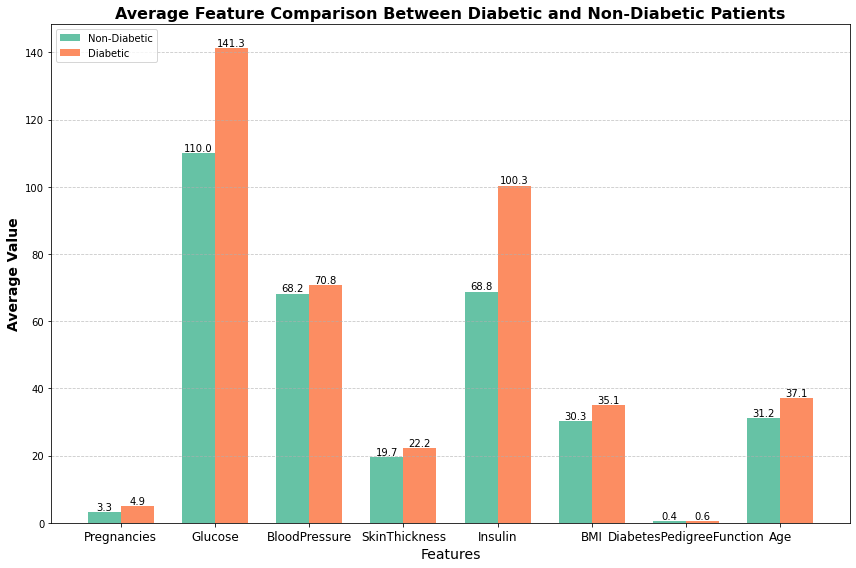

In [ ]:
# Select features to compare and calculate the mean for each Outcome group (0: non-diabetic, 1: diabetic)
features = data.iloc[:,:-1].columns
avg_values = data.groupby('Outcome')[features].mean()

# Set up the figure
plt.figure(figsize=(12, 8))

# Gradient color setup for the bars
colors = ['#66c2a5', '#fc8d62']  # Color for non-diabetic (0) and diabetic (1)

# Creating bar positions
bar_width = 0.35
x = np.arange(len(features))  # Label locations

# Plotting bars for each group
bars1 = plt.bar(x - bar_width / 2, avg_values.loc[0], width=bar_width, color=colors[0], label='Non-Diabetic')
bars2 = plt.bar(x + bar_width / 2, avg_values.loc[1], width=bar_width, color=colors[1], label='Diabetic')

# Adding value labels to each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10, color='black')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Customizing chart appearance
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average Value', fontsize=14, fontweight='bold')
plt.title('Average Feature Comparison Between Diabetic and Non-Diabetic Patients', fontsize=16, fontweight='bold')
plt.xticks(x, features, fontsize=12)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# 13. Density Plot for Smooth Distribution Visualization

In [ ]:
#Plot density graphs for selected variables.
#Customization: Choose smooth color transitions, adjust plot linewidth, and use a soft background color for the plot area.


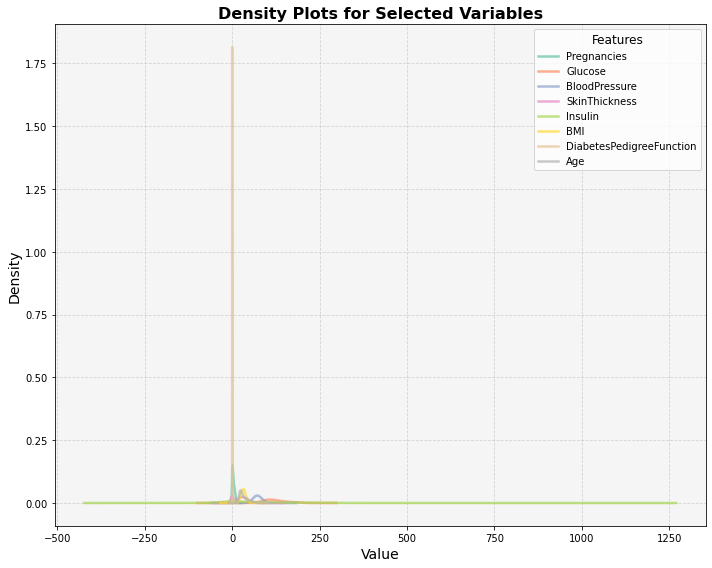

In [ ]:
# Select variables to plot density for all features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']  # Smooth color transitions for each feature

# Set up figure and background color
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('#f5f5f5')  # Soft background color for plot area

# Plot density plots for each feature
for i, feature in enumerate(features):
    data[feature].plot(kind='density', color=colors[i], linewidth=2.5, label=feature, alpha=0.7)

# Customizations for readability
plt.title('Density Plots for Selected Variables', fontsize=16, fontweight='bold')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Features', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Display plot
plt.tight_layout()
plt.show()

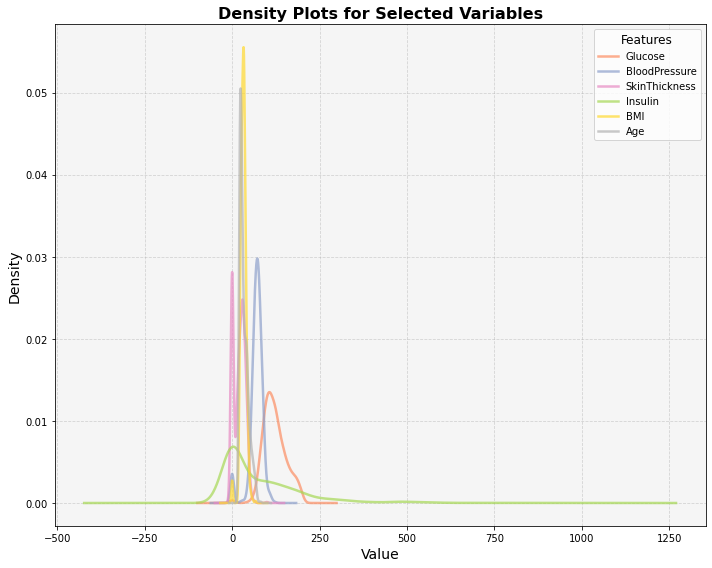

In [ ]:
#Select variables to plot density for all features except Pregnancies and DiabetesPedigreeFunction.
#These two features have high variable density, so they've been excluded to better illustrate the density range of the other features.
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
colors = ['#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#b3b3b3']  # Smooth color transitions for each feature

# Set up figure and background color
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('#f5f5f5')  # Soft background color for plot area

# Plot density plots for each feature
for i, feature in enumerate(features):
    data[feature].plot(kind='density', color=colors[i], linewidth=2.5, label=feature, alpha=0.7)

# Customizations for readability
plt.title('Density Plots for Selected Variables', fontsize=16, fontweight='bold')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Features', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Display plot
plt.tight_layout()
plt.show()

# 14. Plot with Dual Axes:Displayed the relationship of Glucose and BMI across age with each relationship on a separate y-axis

In [ ]:
#Display two relationships on a single plot with dual y-axes.
#Customization: Use complementary colors for each y-axis, synchronize x-axis ticks, and use different line styles for each dataset.


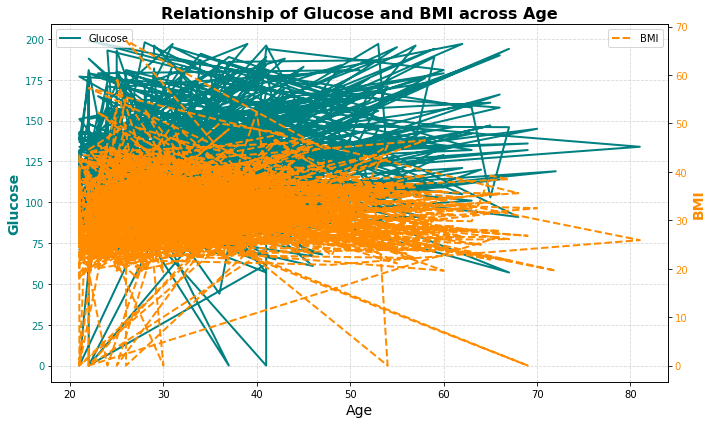

In [ ]:
# Set up figure and axis for dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Glucose' on the primary y-axis
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Glucose', color='teal', fontsize=14, fontweight='bold')
ax1.plot(data['Age'], data['Glucose'], color='teal', linestyle='-', linewidth=2, label='Glucose')
ax1.tick_params(axis='y', labelcolor='teal')

# Set up the second y-axis for 'BMI'
ax2 = ax1.twinx()  # Create a twin y-axis sharing the same x-axis
ax2.set_ylabel('BMI', color='darkorange', fontsize=14, fontweight='bold')
ax2.plot(data['Age'], data['BMI'], color='darkorange', linestyle='--', linewidth=2, label='BMI')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Synchronize x-axis ticks and add grid
ax1.grid(True, linestyle='--', alpha=0.5)

# Title and legend setup
plt.title('Relationship of Glucose and BMI across Age', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display plot
plt.tight_layout()
plt.show()

# 15. Composite Plot:Design a composite figure that includes multiple types of plots in a single layout.

In [ ]:
#Design a composite figure that includes multiple types of plots in a single layout.
#Customization: Ensure consistent color themes across plots, harmonize font sizes, and add a central title for the composite figure.


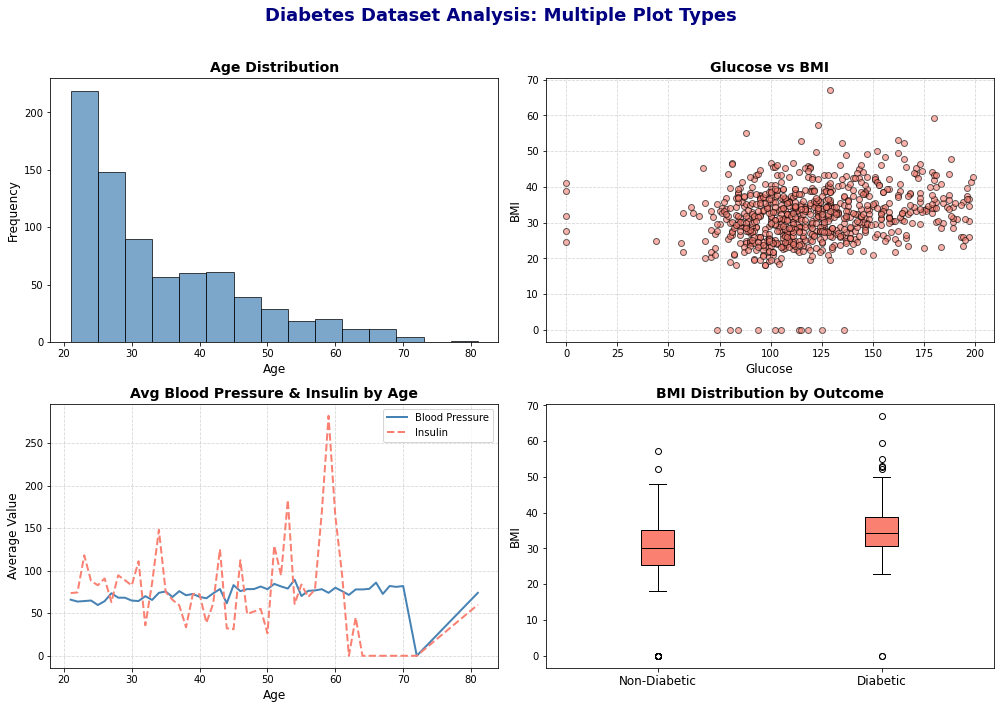

In [ ]:
# Setting up the figure for a 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Diabetes Dataset Analysis: Multiple Plot Types', fontsize=18, fontweight='bold', color='navy')

# Consistent color theme
color1 = 'steelblue'
color2 = 'salmon'

# Plot 1: Histogram for 'Age'
axes[0, 0].hist(data['Age'], bins=15, color=color1, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Plot 2: Scatter plot for 'Glucose' vs 'BMI'
axes[0, 1].scatter(data['Glucose'], data['BMI'], color=color2, alpha=0.6, edgecolor='black')
axes[0, 1].set_title('Glucose vs BMI', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Glucose', fontsize=12)
axes[0, 1].set_ylabel('BMI', fontsize=12)
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: Line plot for average 'BloodPressure' and 'Insulin' across Age
age_groups = data.groupby('Age')[['BloodPressure', 'Insulin']].mean()
axes[1, 0].plot(age_groups.index, age_groups['BloodPressure'], color=color1, linestyle='-', linewidth=2, label='Blood Pressure')
axes[1, 0].plot(age_groups.index, age_groups['Insulin'], color=color2, linestyle='--', linewidth=2, label='Insulin')
axes[1, 0].set_title('Avg Blood Pressure & Insulin by Age', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('Average Value', fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Plot 4: Box plot for 'BMI' by Outcome
axes[1, 1].boxplot([data[data['Outcome'] == 0]['BMI'], data[data['Outcome'] == 1]['BMI']],
                   patch_artist=True, boxprops=dict(facecolor=color2, color='black'),
                   medianprops=dict(color='black'))
axes[1, 1].set_title('BMI Distribution by Outcome', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Non-Diabetic', 'Diabetic'], fontsize=12)
axes[1, 1].set_ylabel('BMI', fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
